In [16]:
import pandas as pd

df1 = pd.read_csv("dataset_grupo1.csv", encoding="latin1", sep=";")
df2 = pd.read_csv("dataset2_grupo1.csv", encoding="latin1", sep=";")
df3 = pd.read_csv("dataset3_grupo1.csv", encoding="latin1", sep=";")

#Dados = planilhona com todas as info
dados = df1.merge(df2, on="Data").merge(df3, on="Data")

print(dados.head())


dados.to_csv("dataset_unificado.csv", index=False, encoding="utf-8-sig")

#conferindo os dados:
print(dados.isnull().sum())
#não há n.a values
print(dados['Data'].value_counts().sort_index())

#aparentemente tudo certo :)
dados.head()

      Data  \
0  12/2006   
1  01/2007   
2  02/2007   
3  03/2007   
4  04/2007   

  433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal  \
0                                              0,48                            
1                                              0,44                            
2                                              0,44                            
3                                              0,37                            
4                                              0,25                            

  3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$  \
0                                            2,1372                                                 
1                                            2,1239                                                 
2                                            2,1174                                                 
3                             

,Data,433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal,3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$,4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões),4469 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governo Federal - R$ (milhões),4470 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Banco Central - R$ (milhões),4472 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governos estaduais - R$ (milhões),4473 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governos municipais - R$ (milhões),13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões),13762 - Dívida bruta do governo geral (% PIB) - Metodologia utilizada a partir de 2008 - %,"13763 - Dívida bruta do governo geral - Saldos em US$ milhões - Metodologia utilizada a partir de 2008 - US$ (milhões),,,,,,,,,,",4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a.,"4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,","29037 - Endividamento das famílias com o Sistema Financeiro Nacional em relação à renda acumulada dos últimos doze meses (RNDBF) - %,"
0,12/2006,"0,48","2,1372","215.338,3","727.318,55","8.481,33","316.863,54","47.073,27","1.336.644,90","55,48","625.418,73","13,19","0,99","21,98"
1,01/2007,"0,44","2,1239","206.662,3","739.728,91","-4.509,71","316.460,09","46.447,36","1.367.451,91","56,17","643.840,6","13,13","1,8","22,28"
2,02/2007,"0,44","2,1174","201.552,1","747.648,62","-4.194,13","317.158,09","46.653,24","1.399.083,71","56,90","660.755,51","12,93","0,87","22,48"
3,03/2007,"0,37","2,0496","223.208,6","750.319,85","5.830,79","316.163,14","46.477,56","1.423.273,45","57,24","694.415,23","12,74","1,5","22,4"
4,04/2007,"0,25","2,0331","218.931,2","745.927,20","7.990,12","314.070,80","46.673,09","1.438.854,85","57,17","707.714,75","12,58","0,94","22,36"


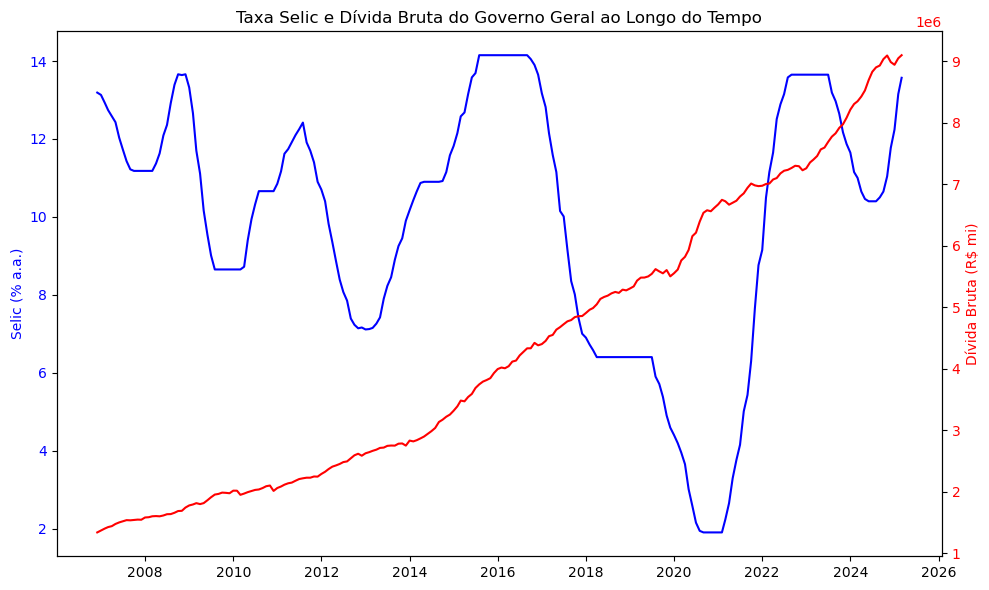

In [17]:
import matplotlib.pyplot as plt

#Taxa SELIC e Dívida Bruta
dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

dados["Selic (% a.a.)"] = dados["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."].str.replace(",", ".").astype(float)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)

fig, ax1 = plt.subplots(figsize=(10, 6))

#Eixo Selic
ax1.plot(dados["Data"], dados["Selic (% a.a.)"], color='blue', label="Selic (% a.a.)")
ax1.set_ylabel("Selic (% a.a.)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

#Eixo da Dívida
ax2 = ax1.twinx()
ax2.plot(dados["Data"], dados["Dívida Bruta (R$ mi)"], color='red', label="Dívida Bruta (R$ milhões)")
ax2.set_ylabel("Dívida Bruta (R$ mi)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Taxa Selic e Dívida Bruta do Governo Geral ao Longo do Tempo")
fig.tight_layout()
plt.show()

In [18]:
#relação entre o crescimento da dívida do governo e as variações da selic
import pandas as pd

dados["Data"] = pd.to_datetime(dados["Data"], format="%m/%Y")

dados["Selic (% a.a.)"] = dados["4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a."].str.replace(",", ".").astype(float)
dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"].str.replace(".", "").str.replace(",", ".").astype(float)

dados["Dívida Aumento (R$ mi)"] = dados["Dívida Bruta (R$ mi)"].diff()

dados = dados.dropna(subset=["Dívida Aumento (R$ mi)"])

correlacao = dados["Selic (% a.a.)"].corr(dados["Dívida Aumento (R$ mi)"])

print(correlacao)

-0.05568478790529951


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Converter para float (mantendo nomes originais das colunas)
dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"] = dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"].str.replace(",", ".").astype(float)
dados["433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal"] = dados["433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal"].str.replace(",", ".").astype(float)

# Calcular a correlação
correlacao_selic_ipca = dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"].corr(
    dados["433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal"]
)
print(correlacao_selic_ipca)


-0.04345195092591911


In [20]:
#correlação e rquadrado
correlacao = dados["Selic (% a.a.)"].corr(dados["Dívida Bruta (R$ mi)"])
print(correlacao)
rquadrado = correlacao ** 2
print(rquadrado)
#resultado tá bem baixo, imagino que tenham outros fatores que estejam no meio dificultando a análise

-0.17354908965195615
0.030119286519022712


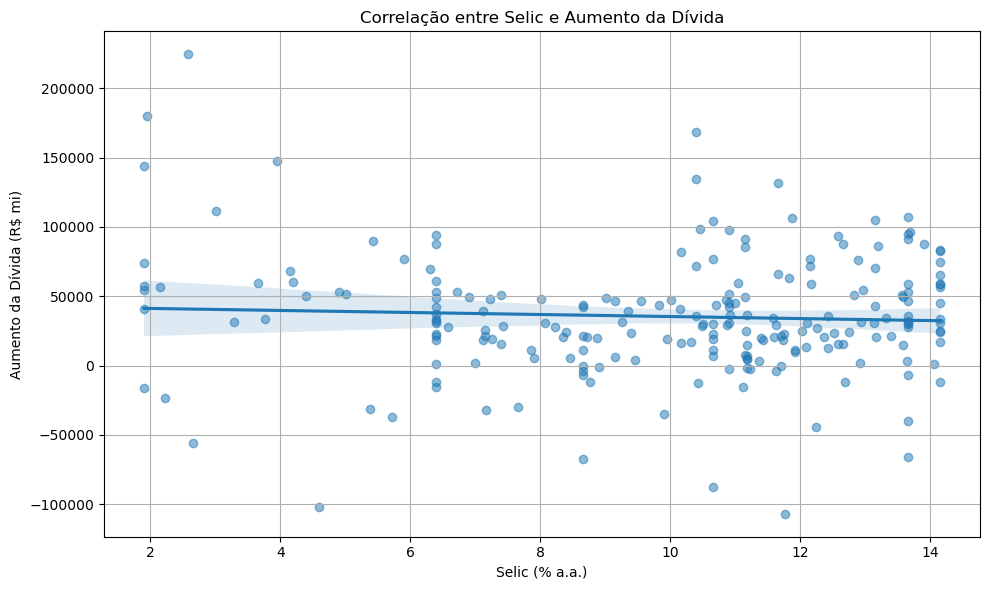

In [21]:
#é a mesma correlação do heatmap, mas fiz em outro tipo de graph.

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x="Selic (% a.a.)", y="Dívida Aumento (R$ mi)", data=dados, scatter_kws={"alpha":0.5})
plt.title("Correlação entre Selic e Aumento da Dívida")
plt.xlabel("Selic (% a.a.)")
plt.ylabel("Aumento da Dívida (R$ mi)")
plt.grid(True)
plt.tight_layout()
plt.show()


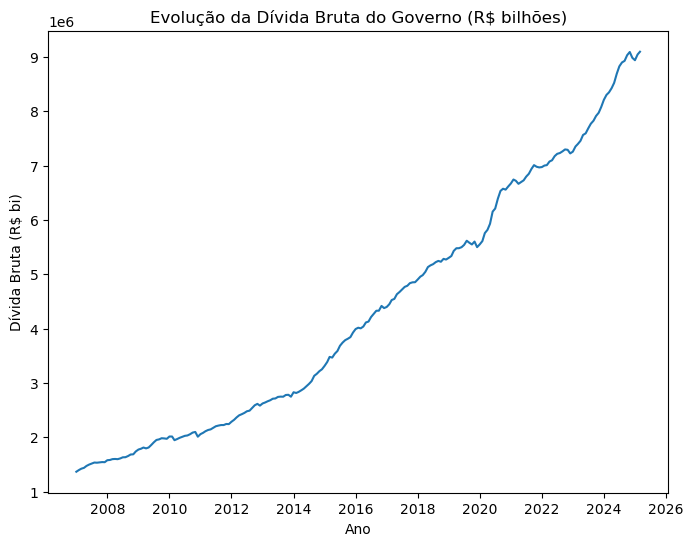

In [22]:
#crescimento Dívida Bruta em linhas, gráfico legal pra introduzir

plt.figure(figsize=(8,6))
sns.lineplot(data=dados, x="Data", y="Dívida Bruta (R$ mi)")
plt.title("Evolução da Dívida Bruta do Governo (R$ bilhões)")
plt.xlabel("Ano")
plt.ylabel("Dívida Bruta (R$ bi)")
plt.show()



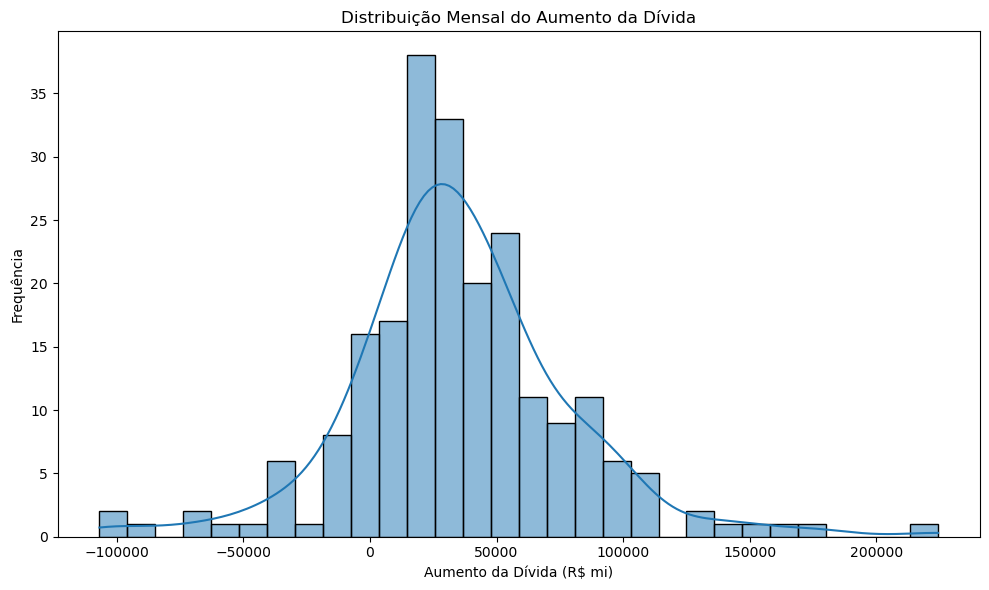

In [23]:
#histograma

plt.figure(figsize=(10, 6))
sns.histplot(dados["Dívida Aumento (R$ mi)"], bins=30, kde=True)
plt.title("Distribuição Mensal do Aumento da Dívida")
plt.xlabel("Aumento da Dívida (R$ mi)")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


C:\Users\ropgr\AppData\Local\Temp\ipykernel_16708\2061332798.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"]\
C:\Users\ropgr\AppData\Local\Temp\ipykernel_16708\2061332798.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Dívida Aumento (R$ mi)"] = dados["Dívida Bruta (R$ mi)"].diff()
C:\Users\ropgr\AppData\Local\Temp\ipykernel_16708\20613

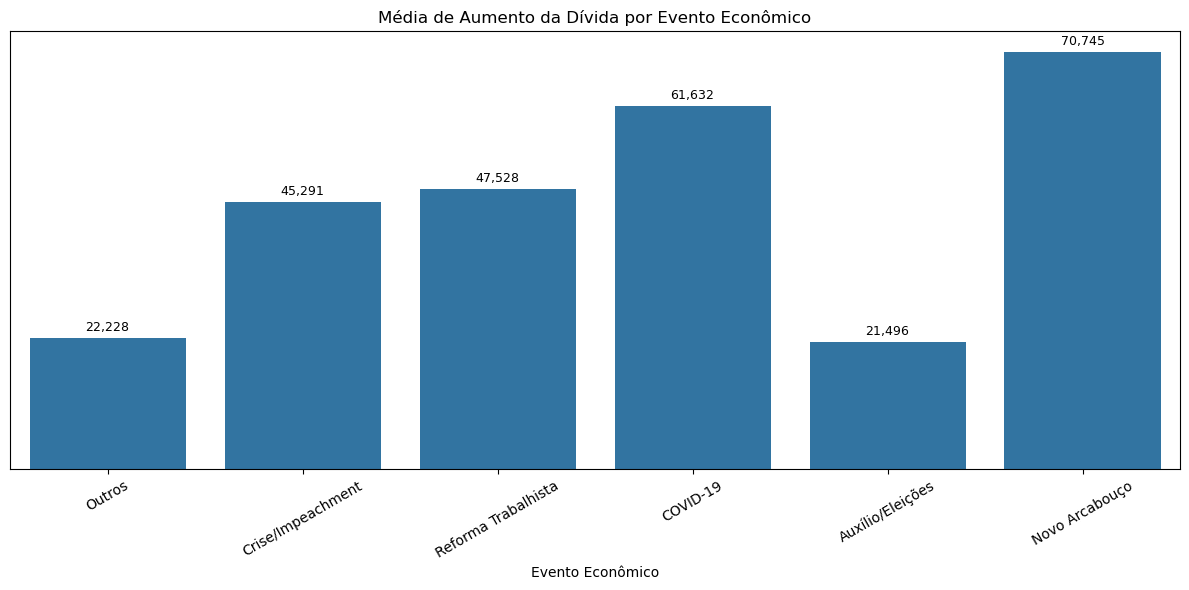

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dados["Dívida Bruta (R$ mi)"] = dados["13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)"]\
    .str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)

dados["Dívida Aumento (R$ mi)"] = dados["Dívida Bruta (R$ mi)"].diff()
dados = dados.dropna(subset=["Dívida Aumento (R$ mi)"])

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=dados, x="Evento_Econômico", y="Dívida Aumento (R$ mi)", estimator=np.mean, ci=None)
plt.xticks(rotation=30)
plt.title("Média de Aumento da Dívida por Evento Econômico")
plt.ylabel("")
plt.xlabel("Evento Econômico")
plt.yticks([])

# aqui rolou uma gptada (muito dificil kkkkkkk)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()



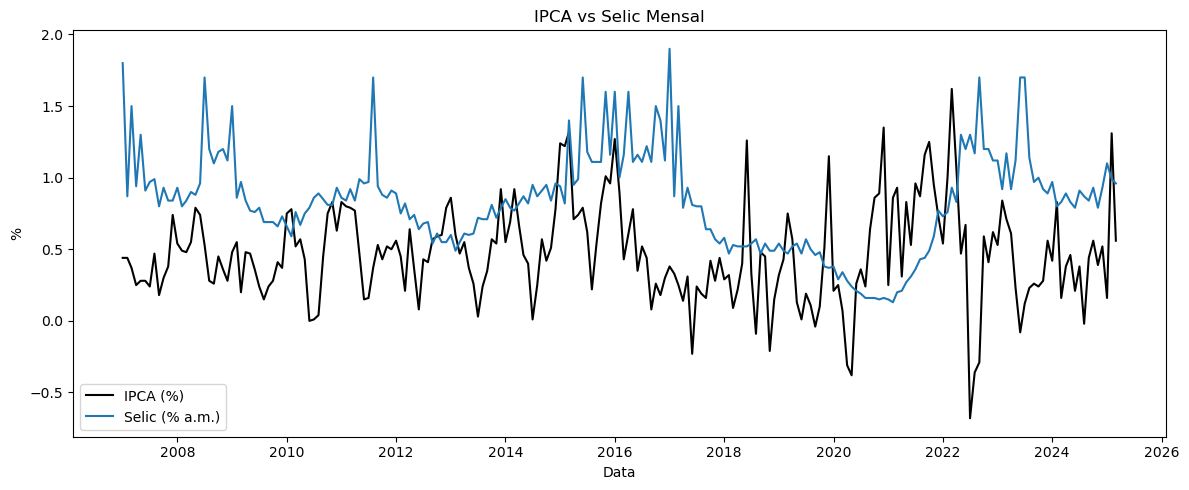

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(dados["Data"], dados["433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal"], label="IPCA (%)", color = "black")
plt.plot(dados["Data"], dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"], label="Selic (% a.m.)",)
plt.title("IPCA vs Selic Mensal")
plt.xlabel("Data")
plt.ylabel("%")
plt.legend()
plt.tight_layout()
plt.show()


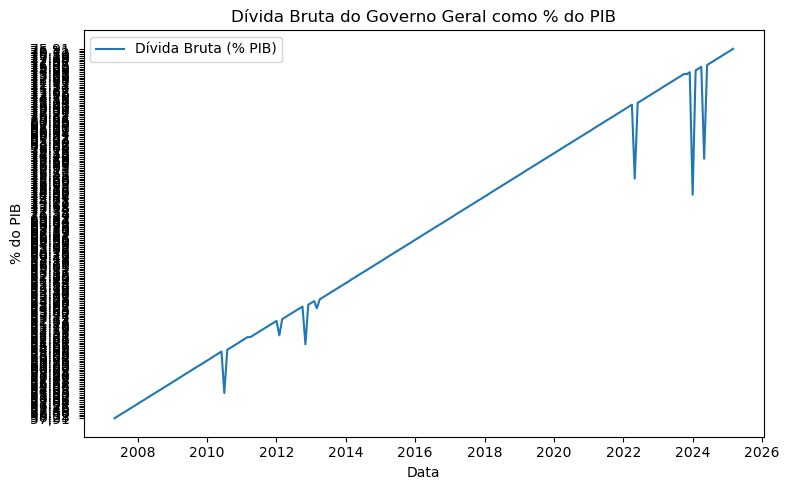

In [39]:
dados["Data"] = pd.to_datetime(dados["Data"])

plt.figure(figsize=(8,5))
plt.plot(dados["Data"], dados["13762 - Dívida bruta do governo geral (% PIB) - Metodologia utilizada a partir de 2008 - %"], label="Dívida Bruta (% PIB)")
plt.title("Dívida Bruta do Governo Geral como % do PIB")
plt.xlabel("Data")
plt.ylabel("% do PIB")
plt.legend()
plt.tight_layout()
plt.show()

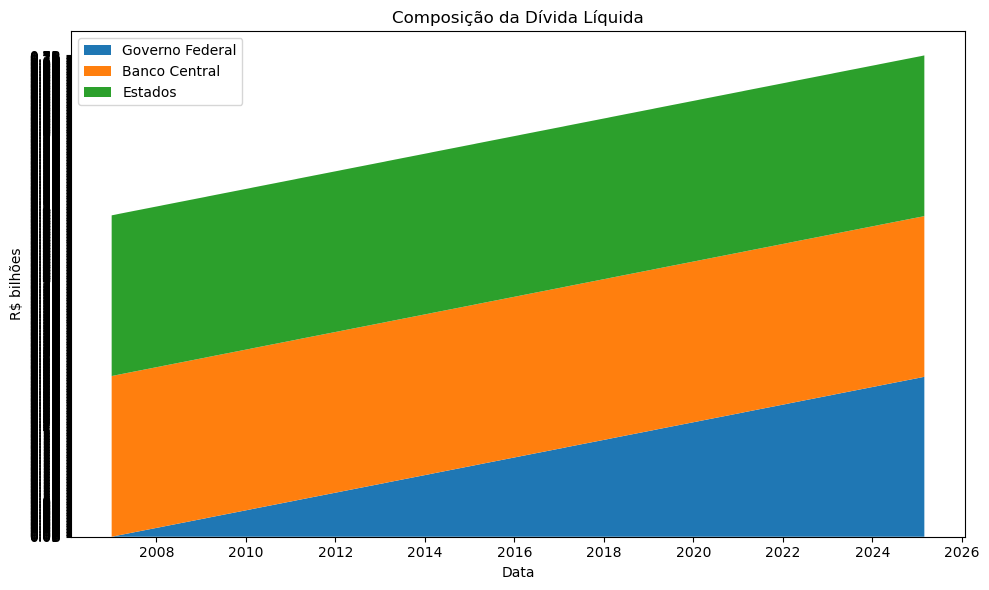

In [ ]:
#vou arrumar isso mais tarde

plt.figure(figsize=(10,6))
plt.stackplot(
    dados["Data"],
    dados["4469 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governo Federal - R$ (milhões)"],
    dados["4472 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governos estaduais - R$ (milhões)"],
    dados["4473 - Dívida Líquida do Setor Público - Saldos em R$ milhões - Total - Governos municipais - R$ (milhões)"],
    labels=["Governo Federal", "Banco Central", "Estados", "Municípios"]
)
plt.title("Composição da Dívida Líquida")
plt.xlabel("Data")
plt.ylabel("R$ milhões")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\ropgr\AppData\Local\Temp\ipykernel_6160\3854132442.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


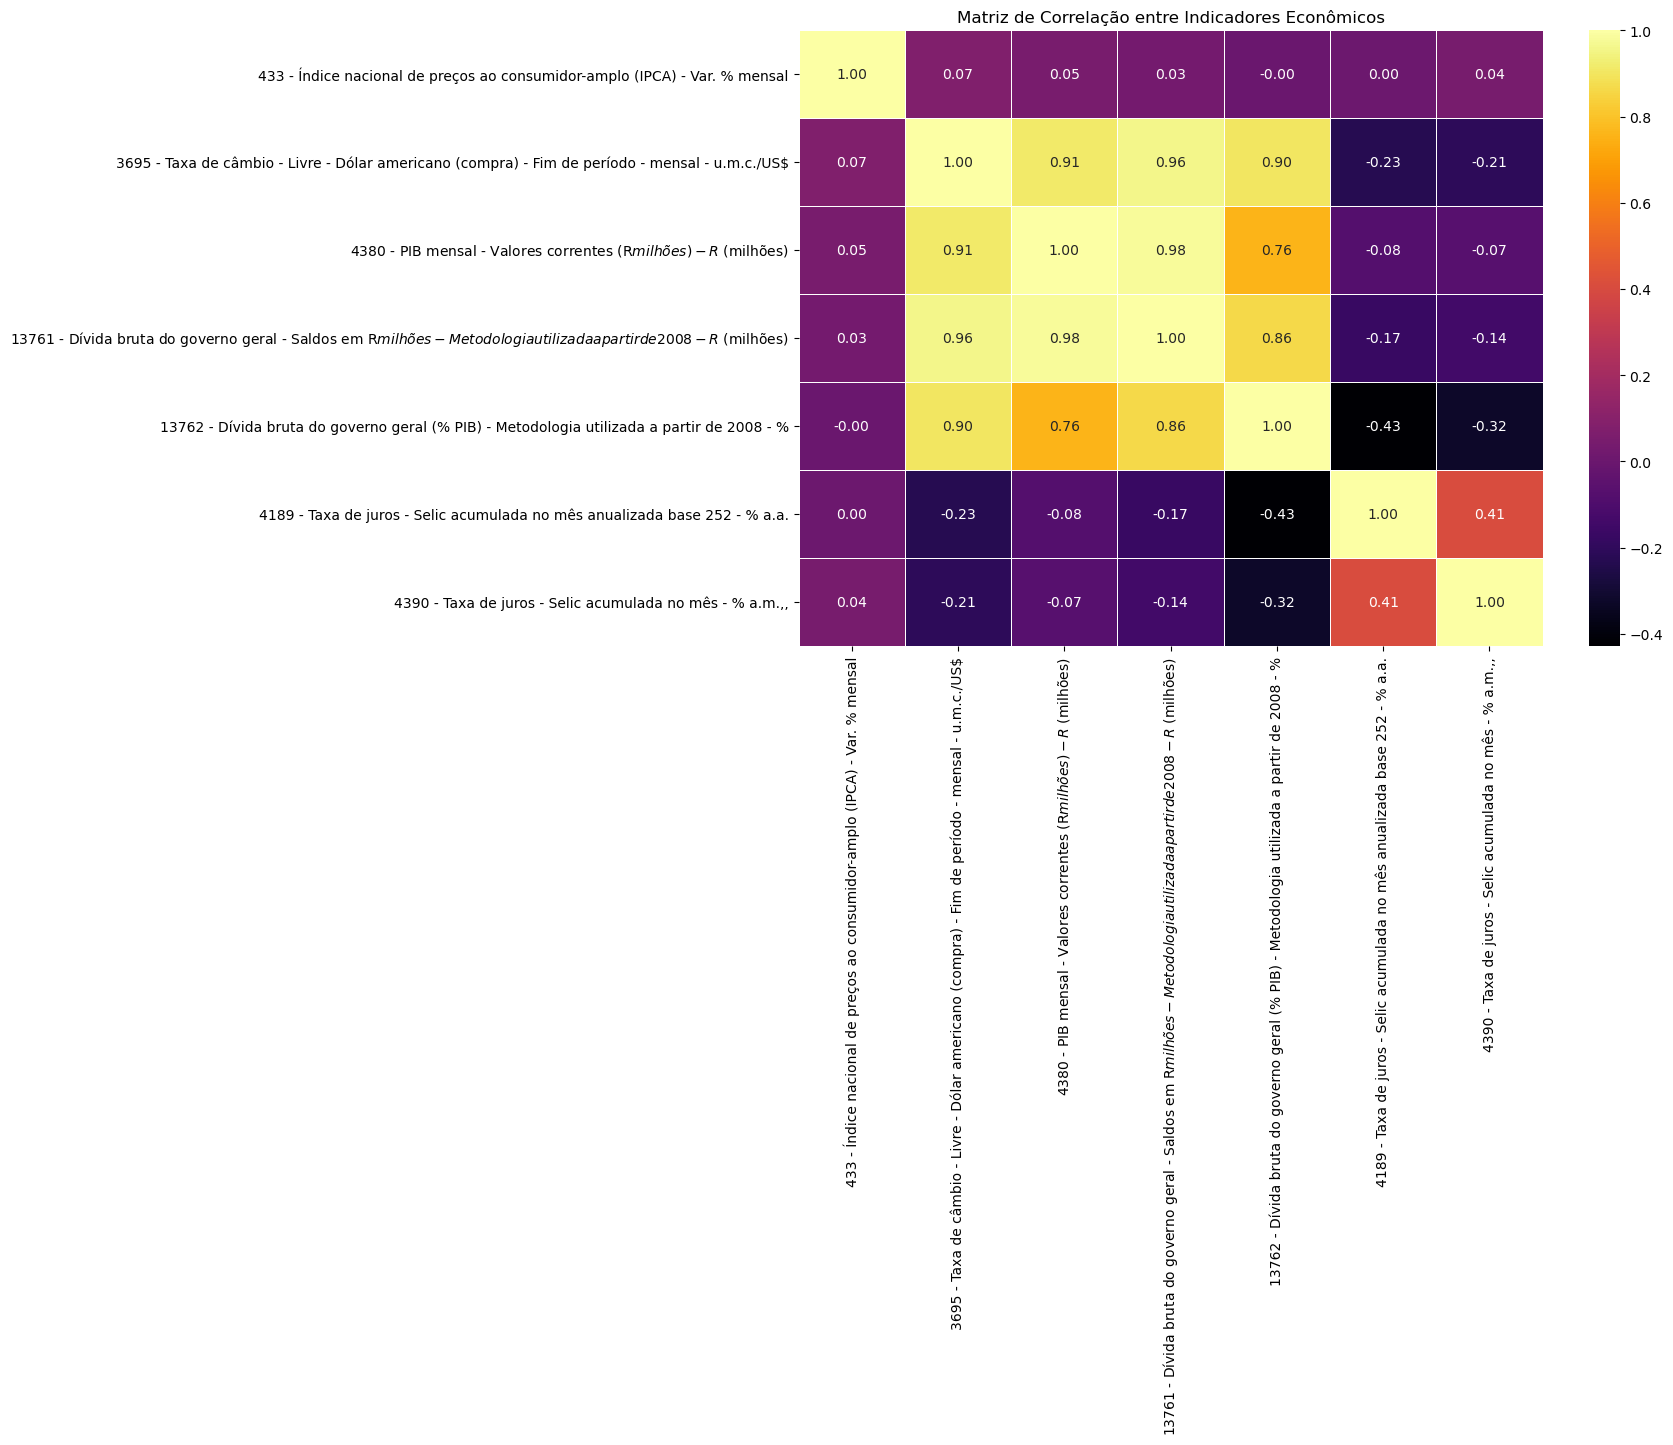

In [ ]:
cols = [
    "433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal",
    "3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$",
    "4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões)",
    "13761 - Dívida bruta do governo geral - Saldos em R$ milhões - Metodologia utilizada a partir de 2008 - R$ (milhões)",
    "13762 - Dívida bruta do governo geral (% PIB) - Metodologia utilizada a partir de 2008 - %",
    "4189 - Taxa de juros - Selic acumulada no mês anualizada base 252 - % a.a.",
    "4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"
]

for col in cols:
    dados[col] = dados[col].astype(str).str.replace(",", ".").str.replace(".", "", regex=False).str.replace(",", ".").astype(float)

matriz = dados[cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(matriz, annot=True, fmt=".2f", cmap="inferno", linewidths=0.5)
plt.title("Matriz de Correlação entre Indicadores Econômicos")
plt.tight_layout()
plt.show()


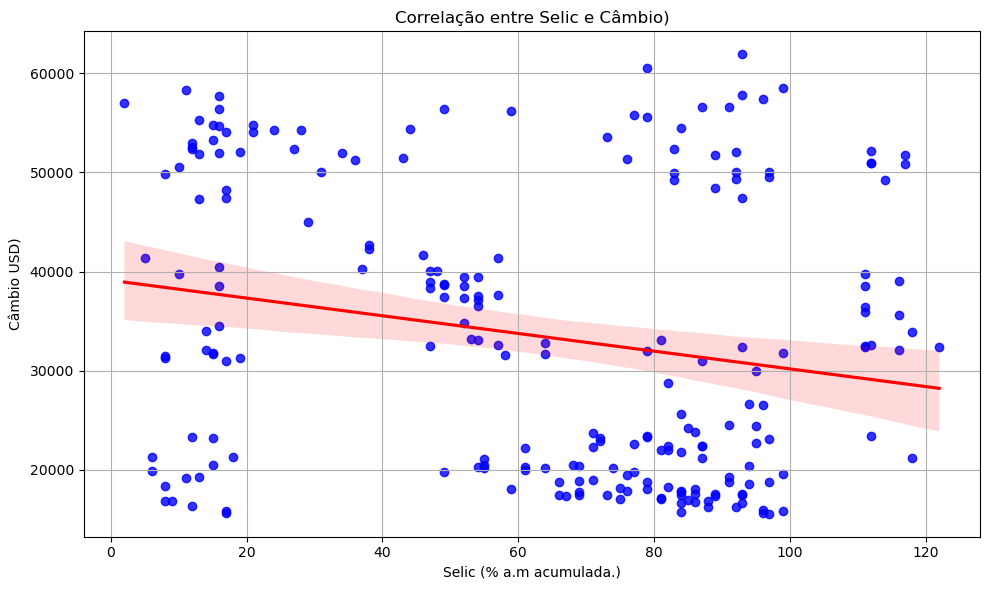

In [ ]:
#refazr

import seaborn as sns
import matplotlib.pyplot as plt

dados["Selic (% a.m.)"] = dados["4390 - Taxa de juros - Selic acumulada no mês - % a.m.,,"].astype(str).str.replace(",", ".").astype(float)
dados["Câmbio (R$/US$)"] = dados["3695 - Taxa de câmbio - Livre - Dólar americano (compra) - Fim de período - mensal - u.m.c./US$"].astype(str).str.replace(",", ".").astype(float)

plt.figure(figsize=(10, 6))
sns.regplot(
    x=dados["Selic (% a.m.)"],
    y=dados["Câmbio (R$/US$)"],
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
)
plt.title("Correlação entre Selic e Câmbio)")
plt.xlabel("Selic (% a.m acumulada.)")
plt.ylabel("Câmbio USD)")
plt.grid(True)
plt.tight_layout()
plt.show()
